<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/Difference_of_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Aim:
Determine DoG of a given image and identify edge points.

Task 1: Choose a pair of Gaussian filters of specific sizes and and standard deviations and determine DoG

Task 2: Change size and standard deviations and observe the changes

Task 3: reduce the size of image and repeat the above

In [ ]:
''' Gaussian Blur - three parameters
img, size of filter, standard deviation (more blur as increases) (start with 2 and with say 3)
try with low sigma and high sigma - and then take the difference
difference should give the edges
then plot the Image with edges

resize the image - to a smaller size (say half the size)

resized image - repair the same things

many details = first sigma value has to increase
'''

In [29]:
from skimage import data
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray

In [30]:
colourimg = data.coffee()

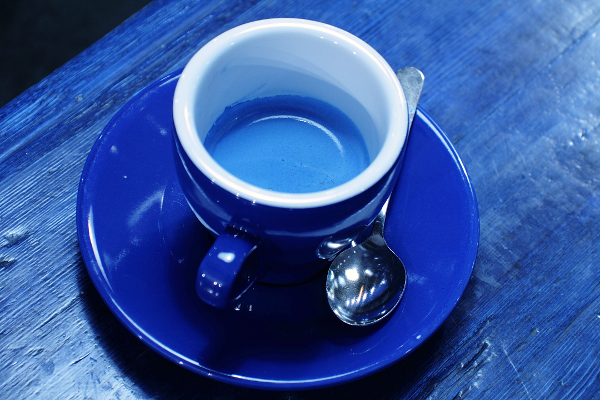

In [31]:
cv2_imshow(colourimg)

In [32]:
img = rgb2gray(colourimg)

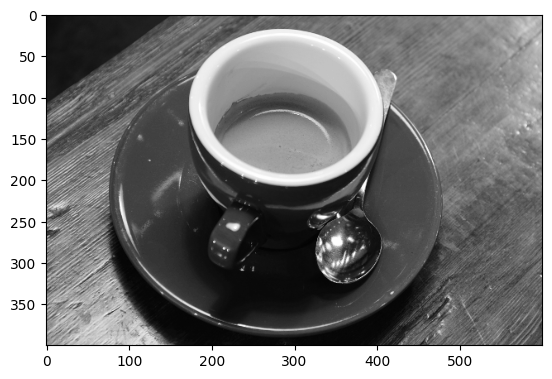

In [35]:
plt.imshow(img, cmap='gray')

In [80]:
img = img*255

In [91]:
def DoG(image, sigma1, sigma2, kernel, threshold=None):
    blurred1 = cv2.GaussianBlur(image, kernel, sigma1)
    blurred2 = cv2.GaussianBlur(image, kernel, sigma2)

    DoG = blurred1 - blurred2
    DoG = (DoG + abs(DoG.min())) / (DoG.max() - DoG.min()) * 255  # Normalize to [0, 255]

    if threshold is not None:
        DoG = (DoG > threshold) * 255

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(2, 2, 2)
    plt.imshow(blurred1, cmap='gray')
    plt.title(f"Blurred with {sigma1}")

    plt.subplot(2, 2, 3)
    plt.imshow(blurred2, cmap='gray')
    plt.title(f"Blurred with {sigma2}")

    plt.subplot(2, 2, 4)
    plt.imshow(DoG, cmap='gray')
    plt.title(f"Difference of Gaussian")

    plt.tight_layout()
    plt.show()

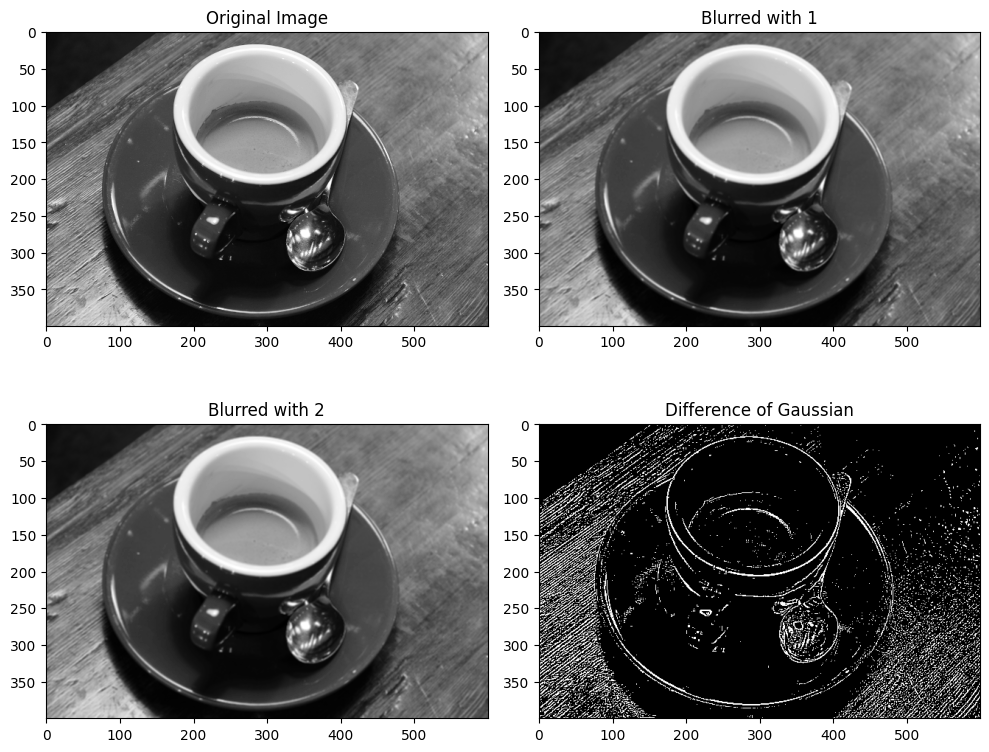

In [94]:
DoG(img,
    sigma1 = 1,
    sigma2 = 2,
    kernel=(3,3),
    threshold=100)

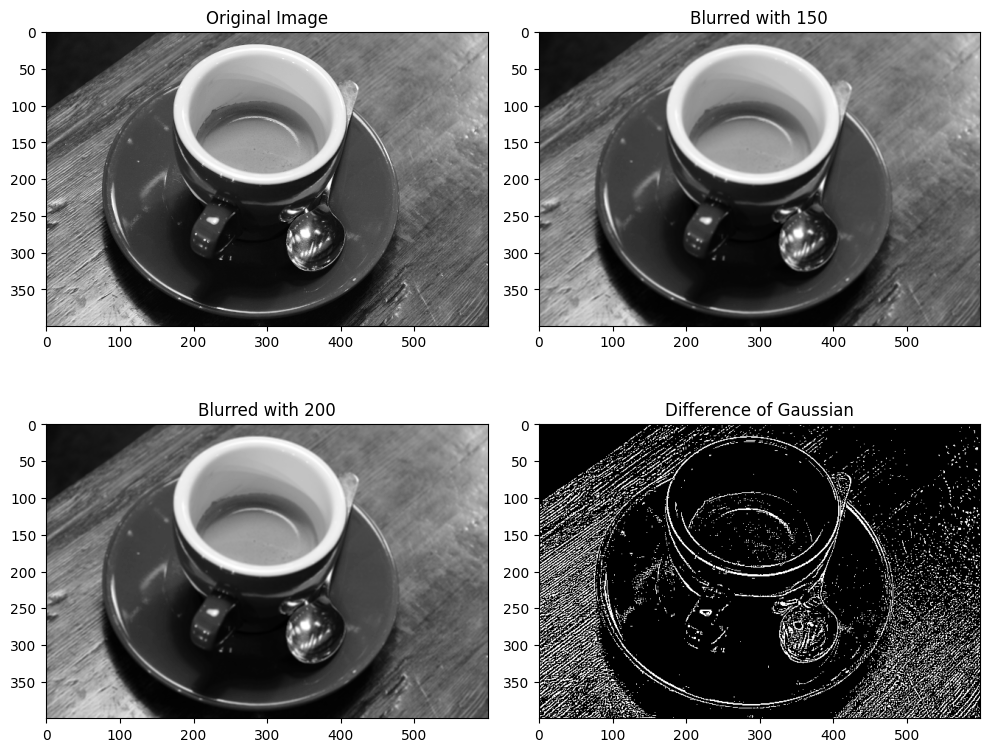

In [98]:
DoG(img,
    sigma1 = 150,
    sigma2 = 200,
    kernel=(3,3),
    threshold=100)

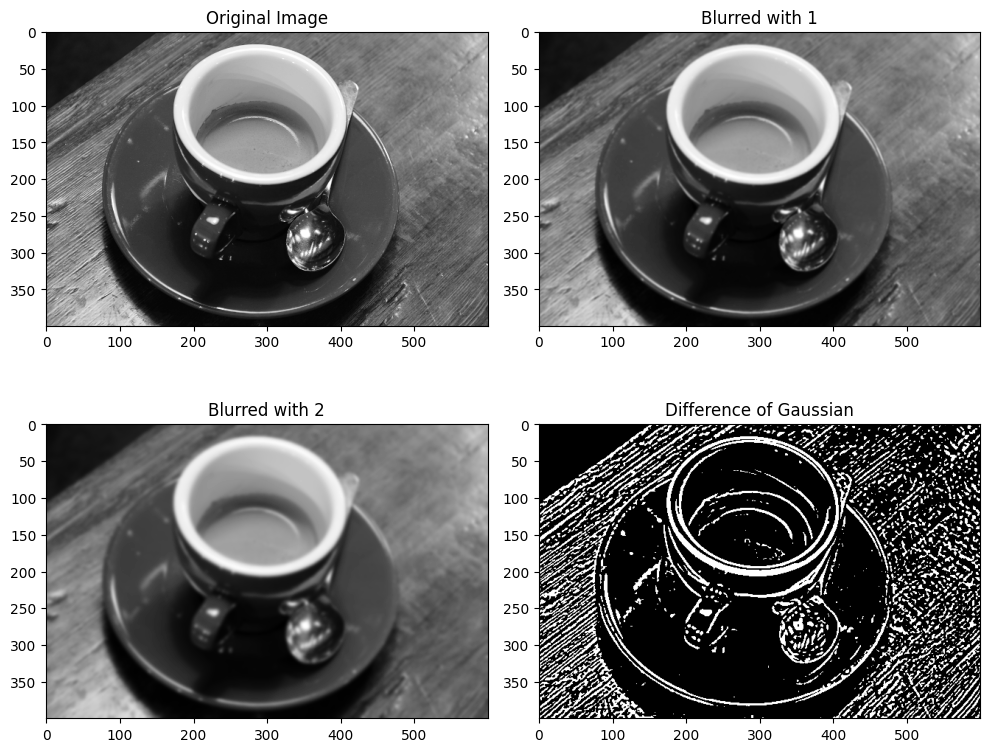

In [102]:
DoG(img,
    sigma1 = 1,
    sigma2 = 2,
    kernel=(15, 15),
    threshold=100)

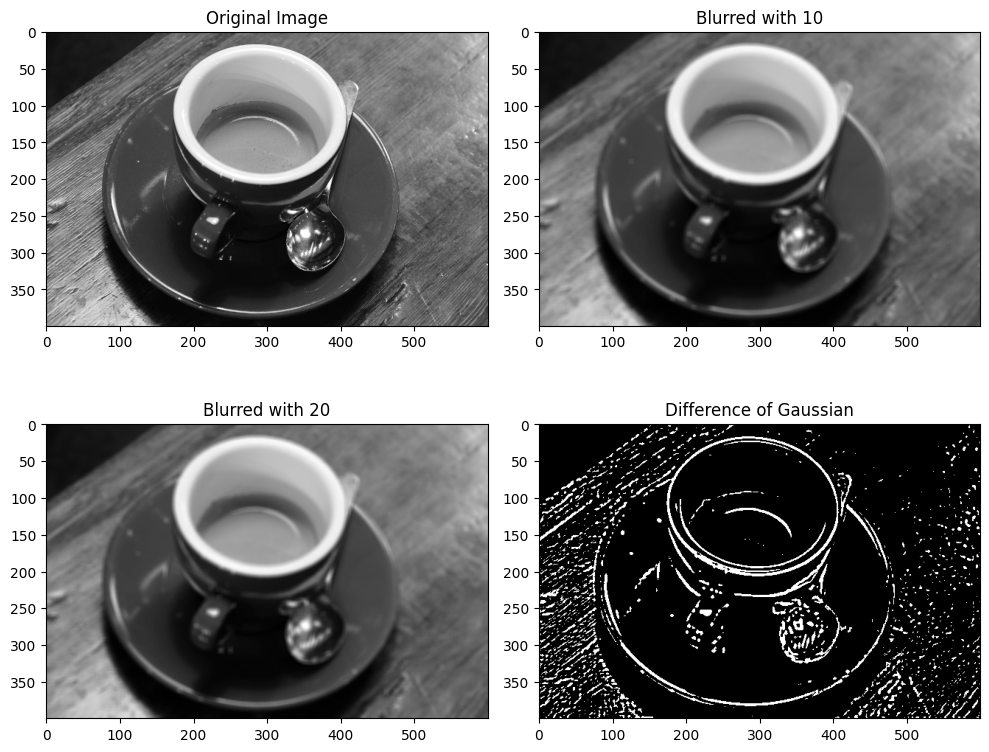

In [103]:
DoG(img,
    sigma1 = 10,
    sigma2 = 20,
    kernel=(7,7),
    threshold=100)

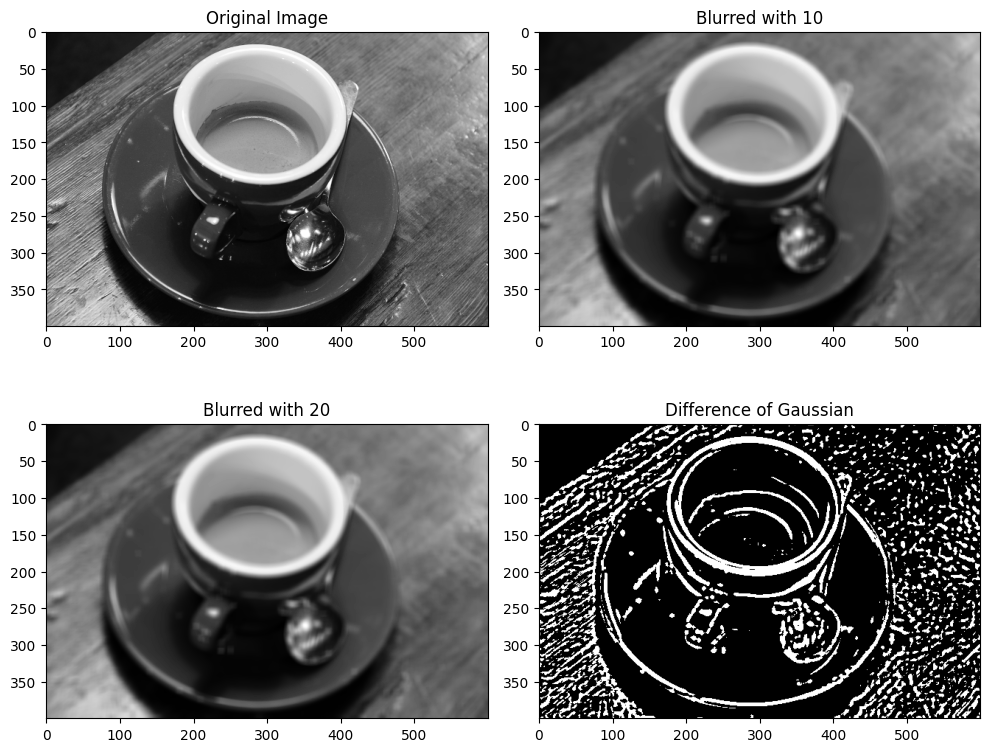

In [105]:
DoG(img,
    sigma1 = 10,
    sigma2 = 20,
    kernel=(9,9),
    threshold=100)

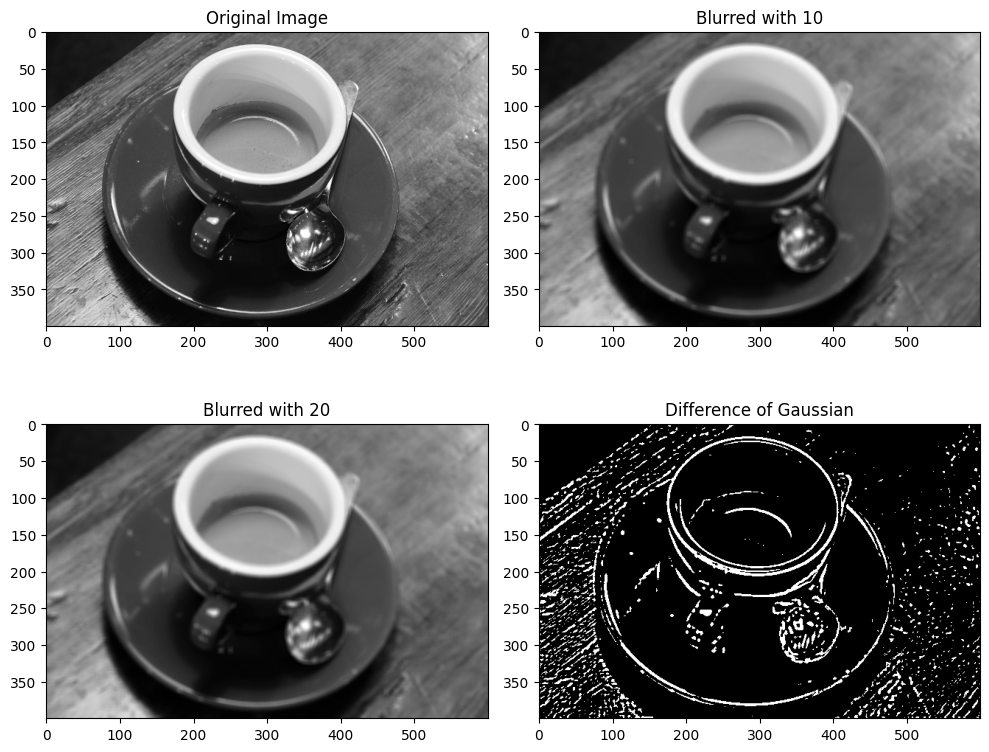

In [106]:
DoG(img,
    sigma1 = 10,
    sigma2 = 20,
    kernel=(7,7),
    threshold=100)

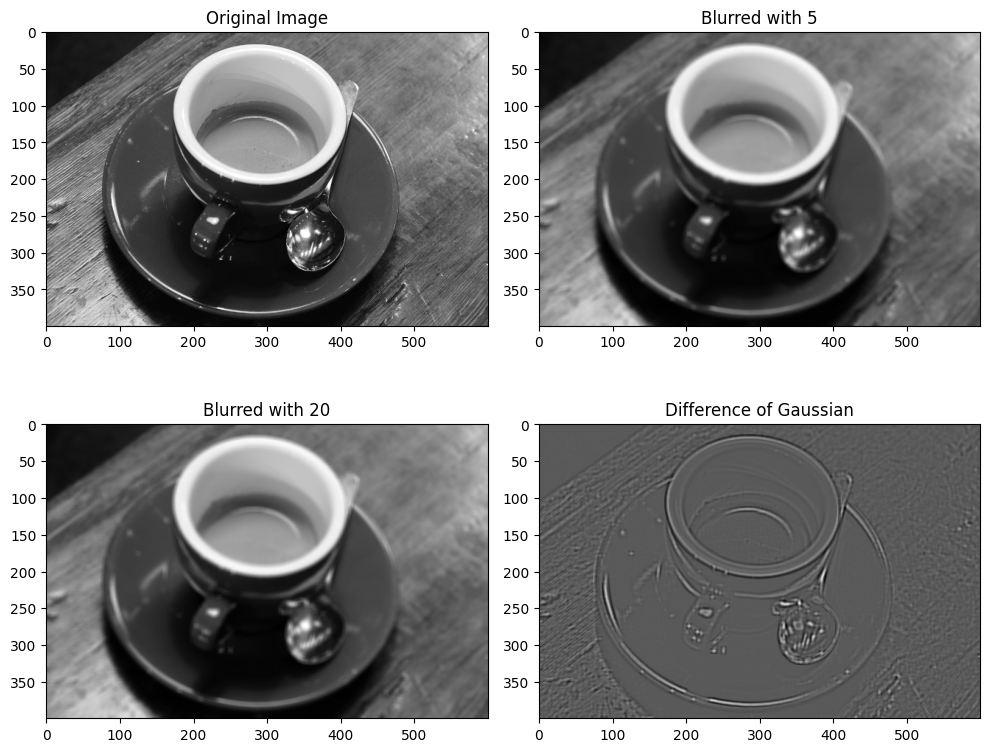

In [107]:
DoG(img,
    sigma1 = 5,
    sigma2 = 20,
    kernel= (7,7)
    # No threshold - to see the difference
)

#### Image Resizing

In [108]:
print('Original Dimensions : ',img.shape)

scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (400, 600)
Resized Dimensions :  (200, 300)


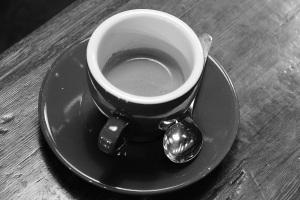

In [109]:
cv2_imshow(resized)

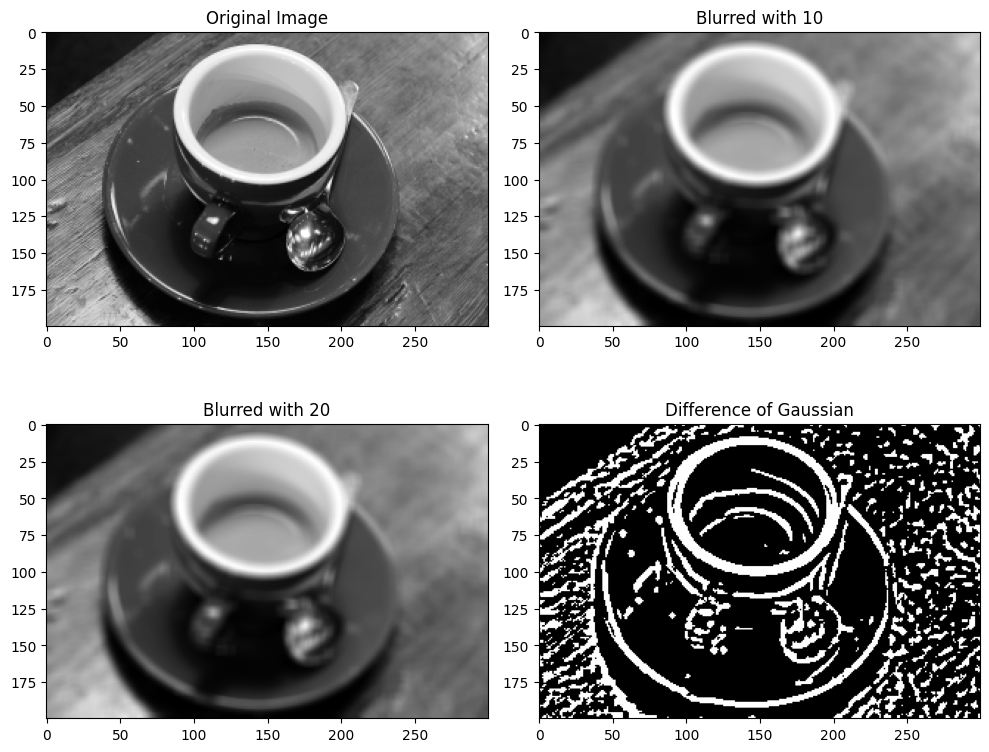

In [111]:
DoG(resized, 10, 20, (7,7), 100)

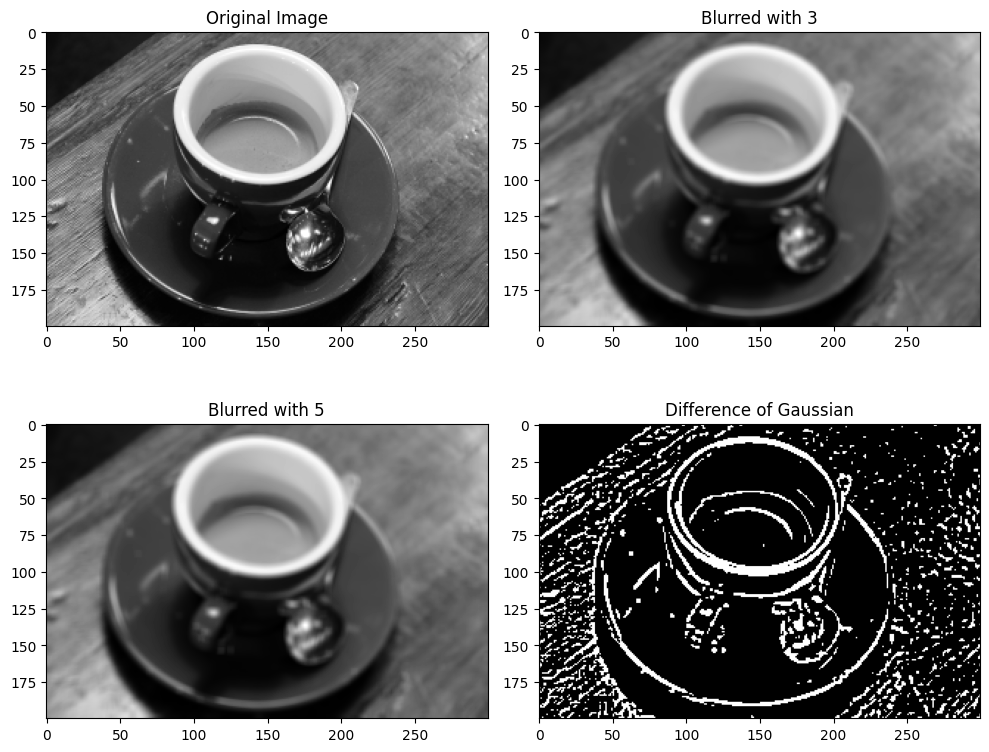

In [114]:
DoG(resized, 3, 5, (5,5), 100)

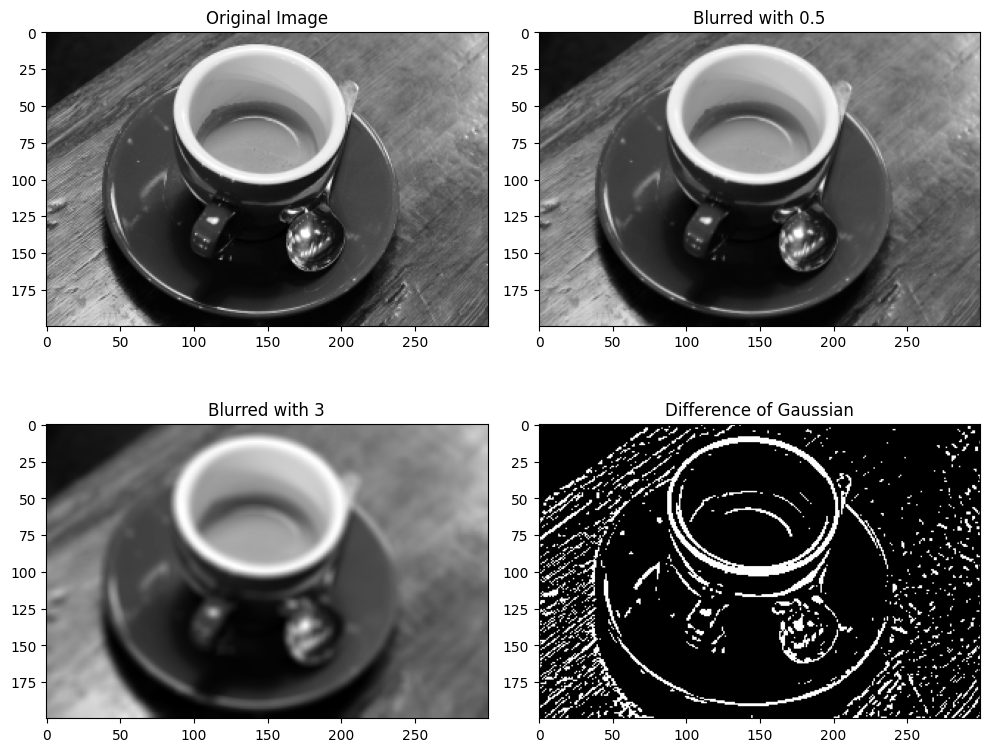

In [116]:
DoG(resized, 0.5, 3, (7,7), 100)

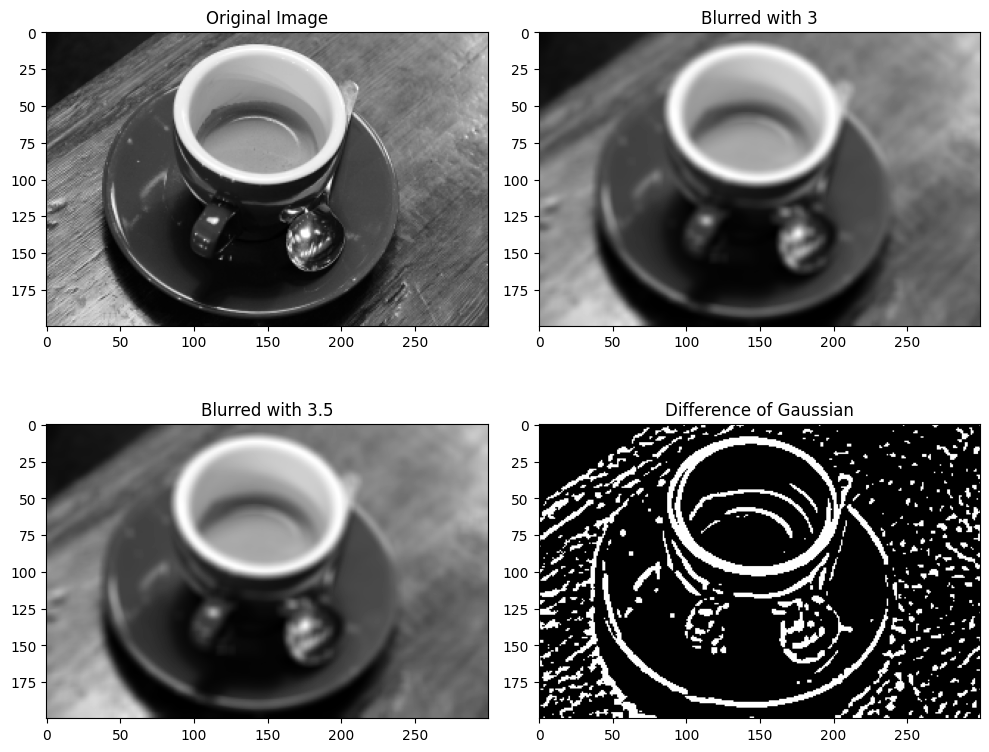

In [117]:
DoG(resized, 3, 3.5, (7,7), 100)

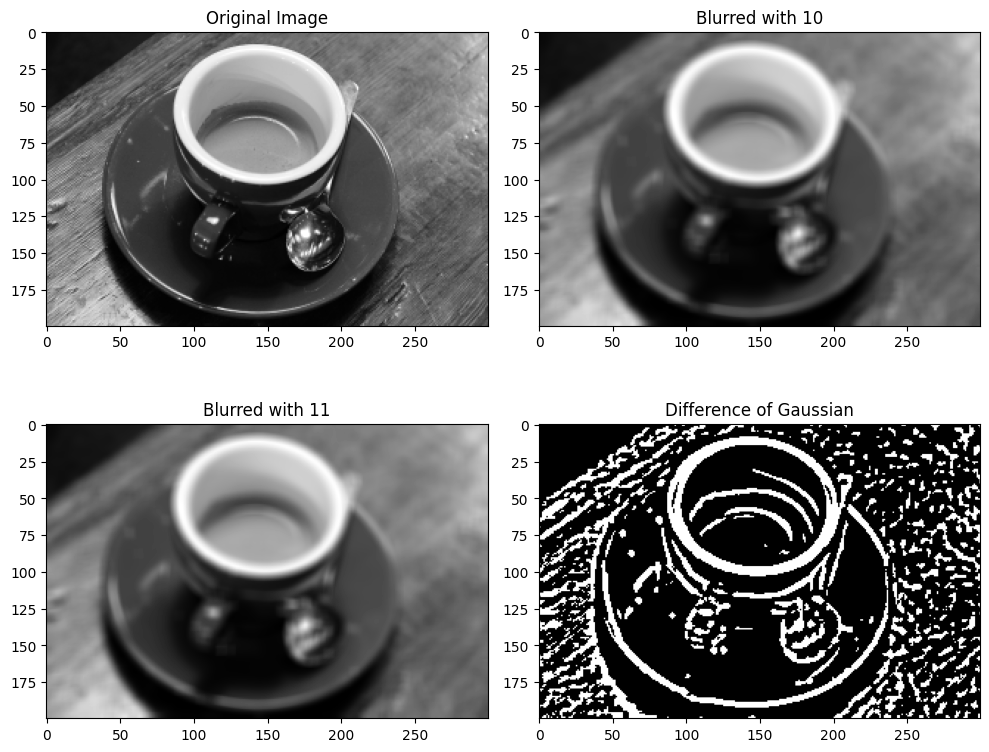

In [119]:
DoG(resized, 10, 11, (7,7), 100)

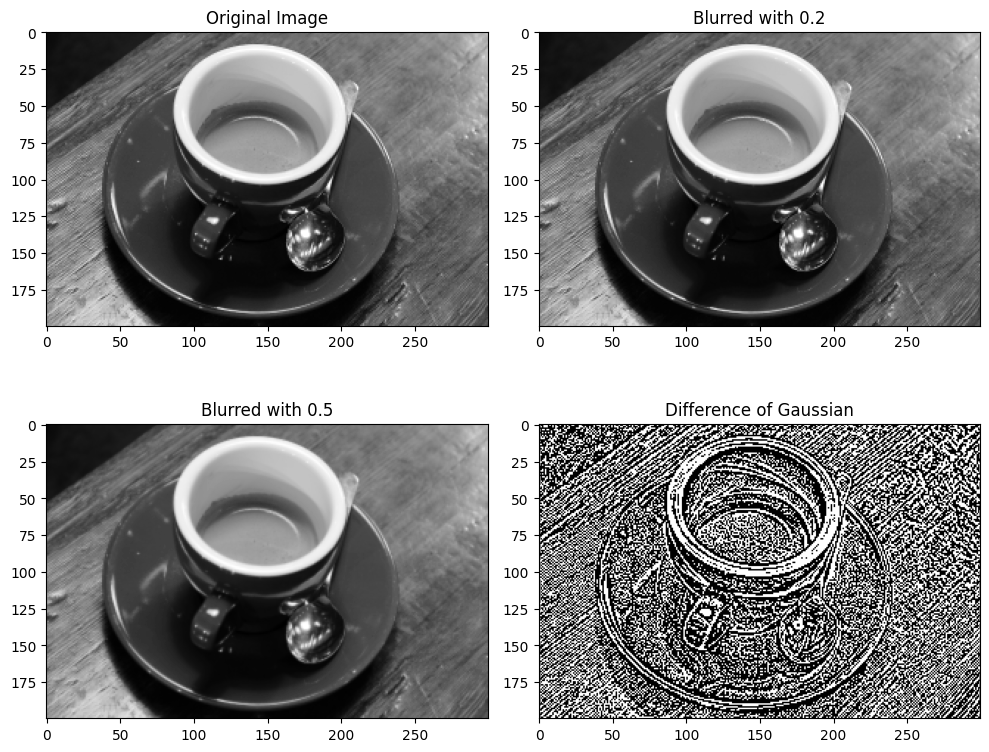

In [124]:
DoG(resized, 0.2, 0.5, (3,3), 100)

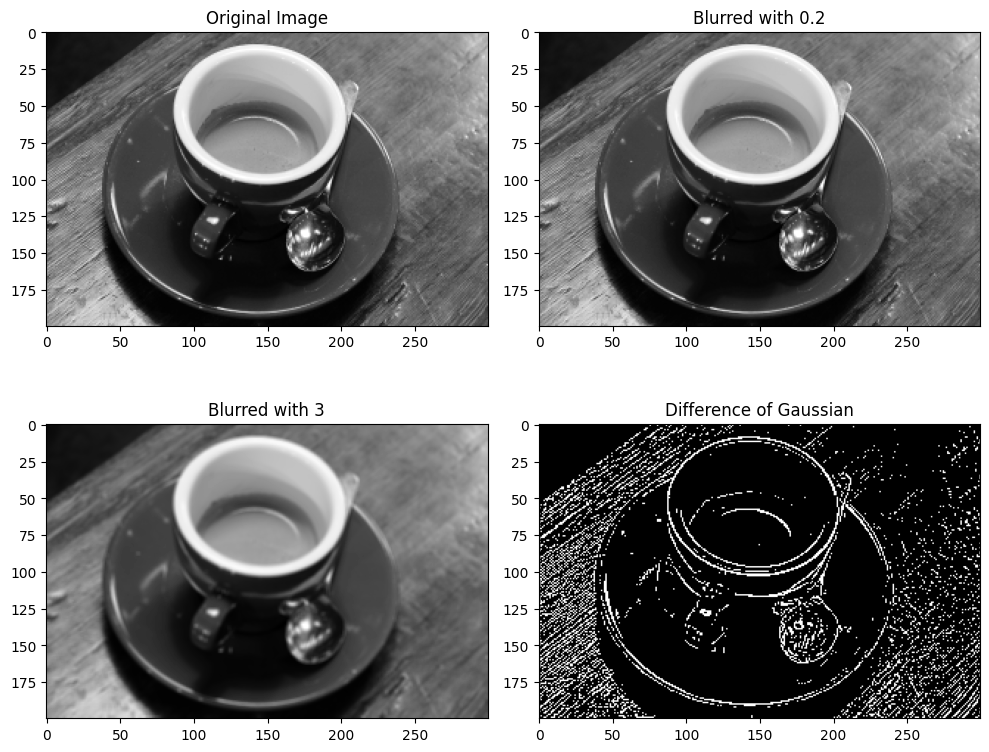

In [125]:
DoG(resized, 0.2, 3, (3,3), 100)

### Conclusion:
1. DoG (Difference of Gaussians) was applied to determine the edge points of the given image using the following parameters:

    * Kernel Size: (7, 7)

    * Sigma1: 10

    * Sigma2: 20

    * Threshold: 100

    This combination of parameters gives an accurate image with edges detected with removing the edges detected of the texture of table

2. When sigma1 is large and sigma2 is much larger than sigma1, the resulting DoG image is almost zero. This is due to the image being heavily blurred in the first step (sigma1), leading to significant information loss. As a result, sigma2 does not provide much additional information compared to the already heavily blurred image, resulting in a very small DoG and less distinguishable features.

3. Increasing the kernel size in DoG operations makes the detected edges thicker.

4. Reducing the size of the image helps to obtain well-defined and thicker edges.

The conclusion provides a clear summary of the results obtained by applying DoG edge detection with different parameters and the effects of kernel size and image size reduction on the edge detection process.

In [126]:
%%shell
jupyter nbconvert --to html

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

CalledProcessError: ignored